### Error plots for all models and tasks 

In [99]:
dict_mse = {
    "Avg Prominence": {
        "Absolute Prominence": 0.63,
        "Relative to Previous Words": 0.76,
        "Relative to Mean": 0.44,
    },
    "Word Statistics": {
        "Absolute Prominence": 0.43,
        "Relative to Previous Words": 0.69,
        "Relative to Mean": 0.44,
    },
    "GloVe": {
        "Absolute Prominence": 0.41,
        "Relative to Previous Words": 0.68,
        "Relative to Mean": 0.4,
    },
    "GPT-2": {
        "Absolute Prominence": 0.35,
        "Relative to Previous Words": 0.44,
        "Relative to Mean": 0.37,
    },
    "BERT": {
        "Absolute Prominence": 0.31,
        "Relative to Previous Words": 0.41,
        "Relative to Mean": 0.34,
    },
}

dict_r2 = {
    "Avg Prominence": {
        "Absolute Prominence": 0.00,
        "Relative to Previous Words": 0.0,
        "Relative to Mean": 0.0,
    },
    "Word Statistics": {
        "Absolute Prominence": 0.35,
        "Relative to Previous Words": 0.29,
        "Relative to Mean": 0.01,
    },
    "GloVe": {
        "Absolute Prominence": 0.36,
        "Relative to Previous Words": 0.3,
        "Relative to Mean": 0.02,
    },
    "GPT-2": {
        "Absolute Prominence": 0.46,
        "Relative to Previous Words": 0.54,
        "Relative to Mean": 0.13,
    },
    "BERT": {
        "Absolute Prominence": 0.51,
        "Relative to Previous Words": 0.57,
        "Relative to Mean": 0.20,
    },
}


dict_pearson = {
    "Avg Prominence": {
        "Absolute Prominence": "undef",
        "Relative to Previous Words": "undef",
        "Relative to Mean": "undef",
    },
    "Word Statistics": {
        "Absolute Prominence": 0.59,
        "Relative to Previous Words": 0.53,
        "Relative to Mean": 0.12,
    },
    "GloVe": {
        "Absolute Prominence": 0.6,
        "Relative to Previous Words": 0.55,
        "Relative to Mean": 0.16,
    },
    "GPT-2": {
        "Absolute Prominence": 0.68,
        "Relative to Previous Words": 0.74,
        "Relative to Mean": 0.37,
    },
    "BERT": {
        "Absolute Prominence": 0.72,
        "Relative to Previous Words": 0.76,
        "Relative to Mean": 0.45,
    },
}

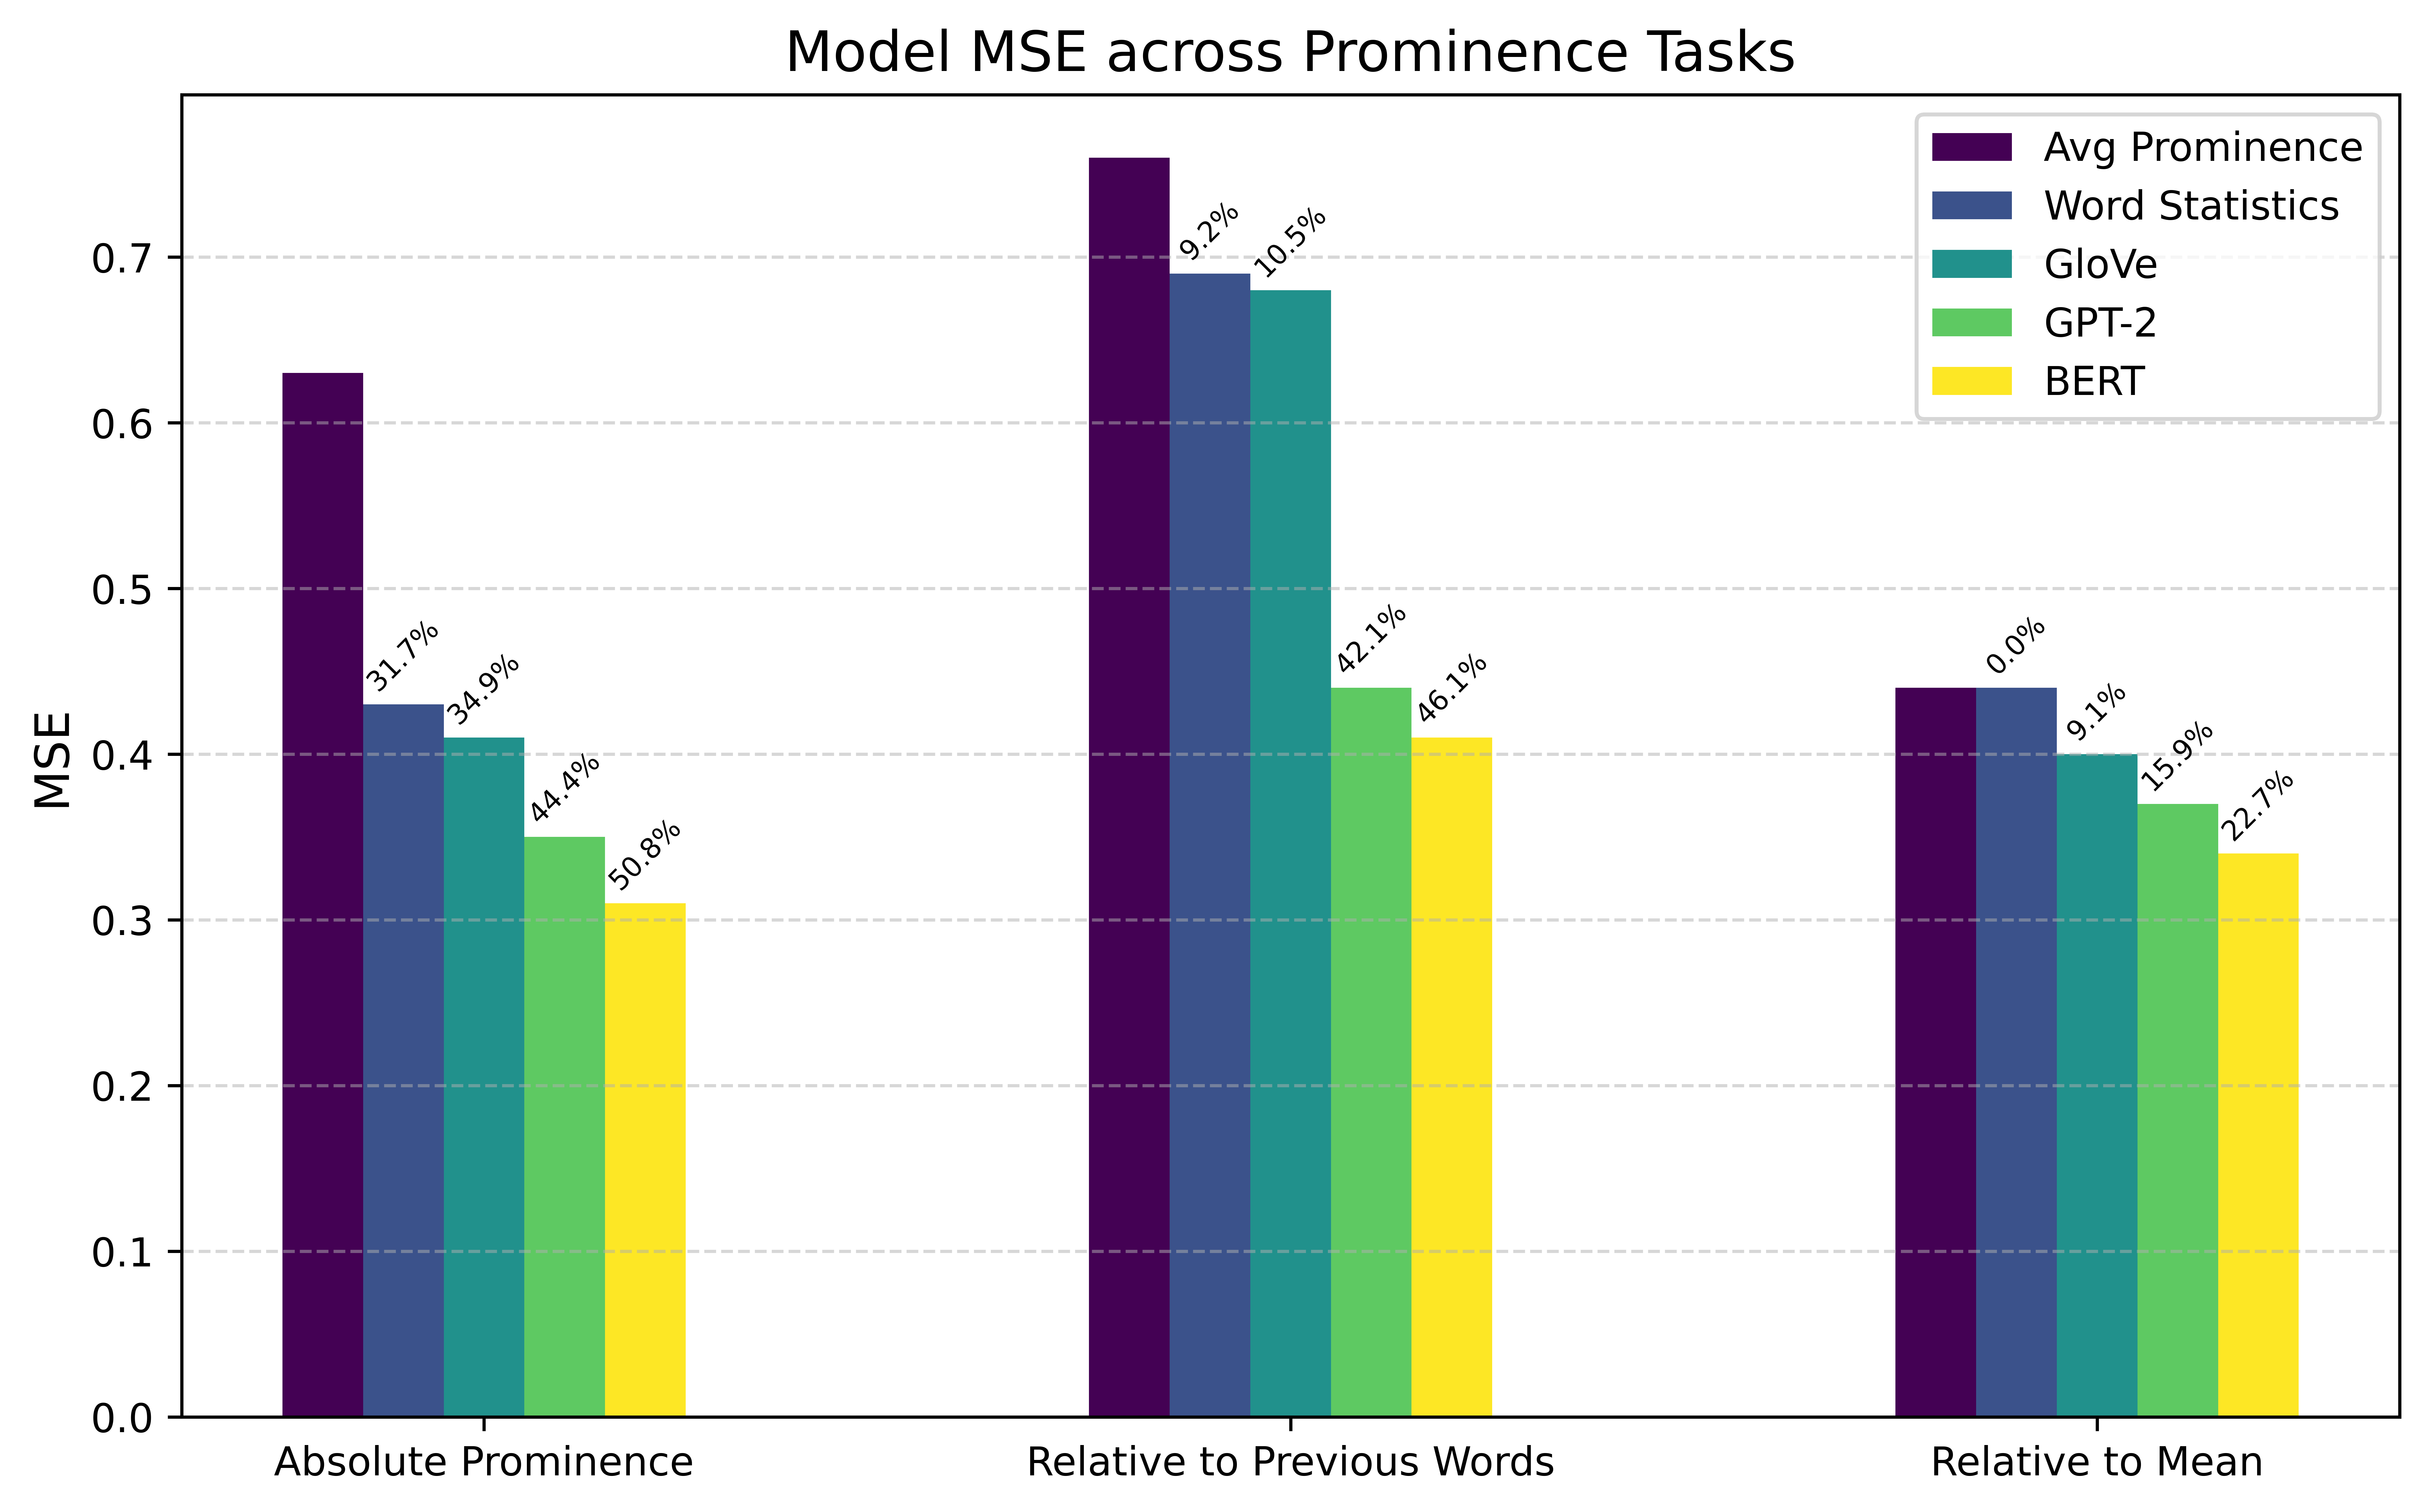

In [100]:
from src.utils.plots import plot_language_model_performance

# Call the function with the provided data
plot_language_model_performance(
    dict_mse, title="Model MSE across Prominence Tasks", minmetric=True
)

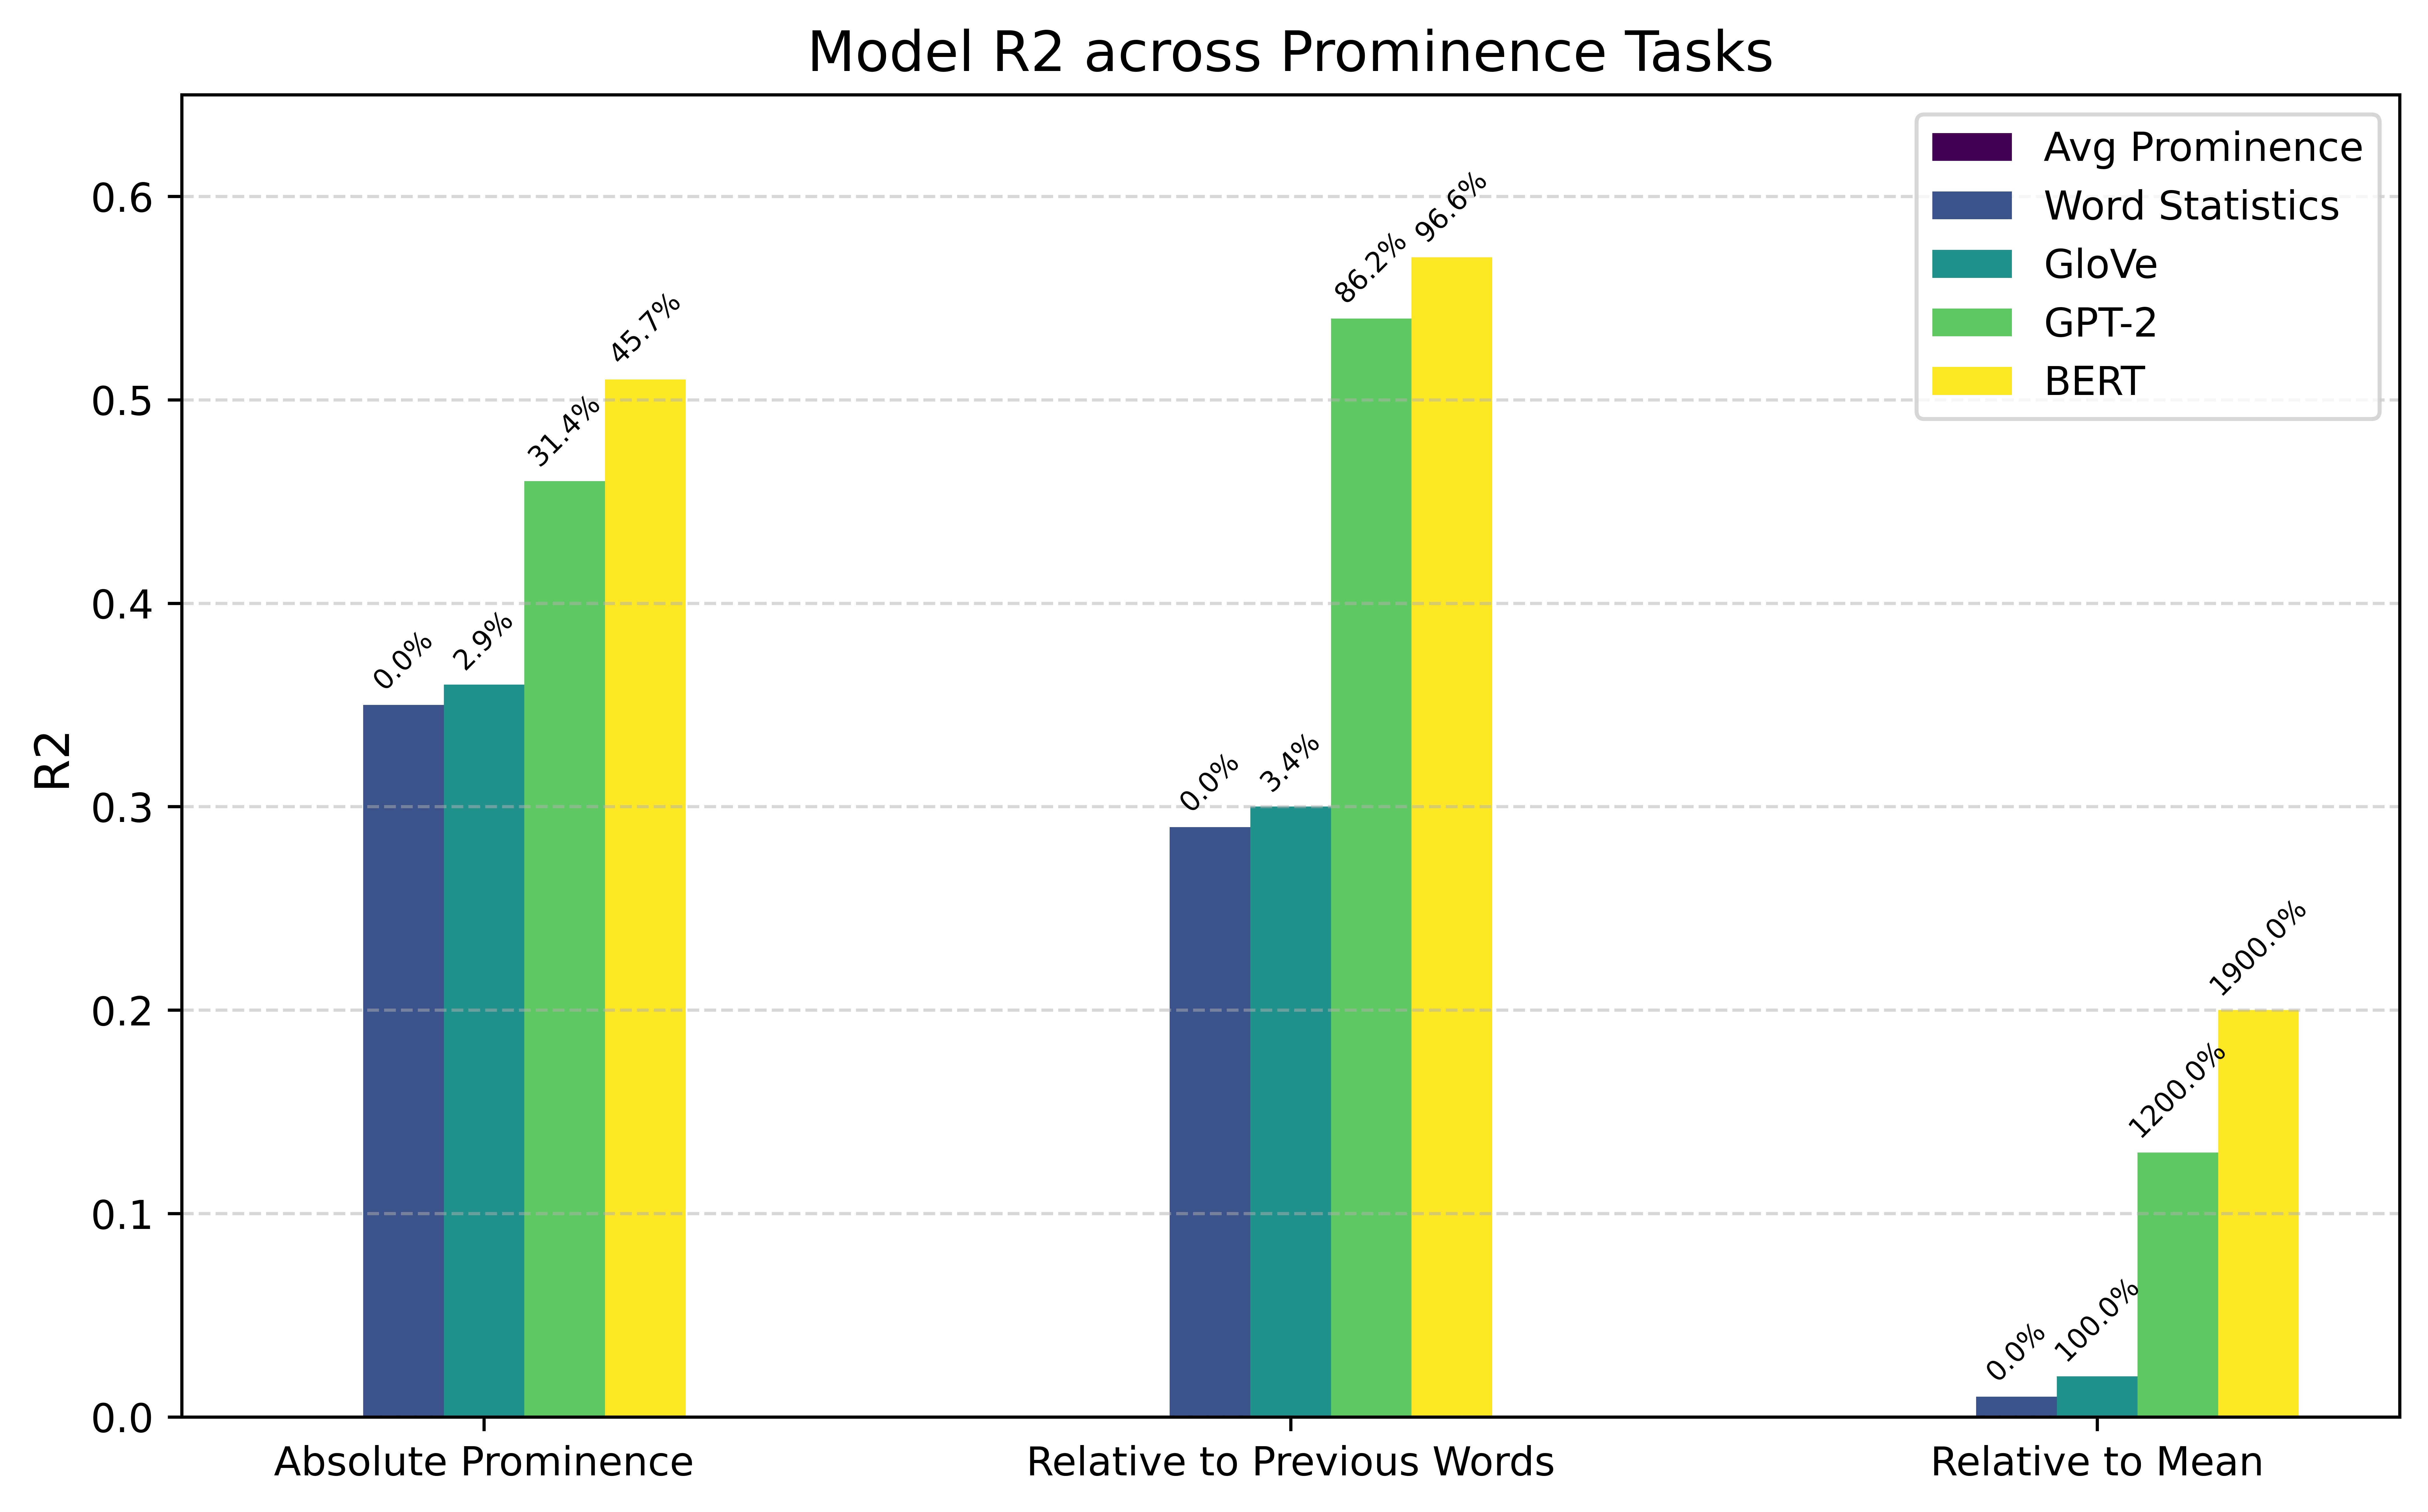

In [101]:
plot_language_model_performance(
    dict_r2, title="Model R2 across Prominence Tasks", metric="R2", y_lim=(0, 0.65)
)

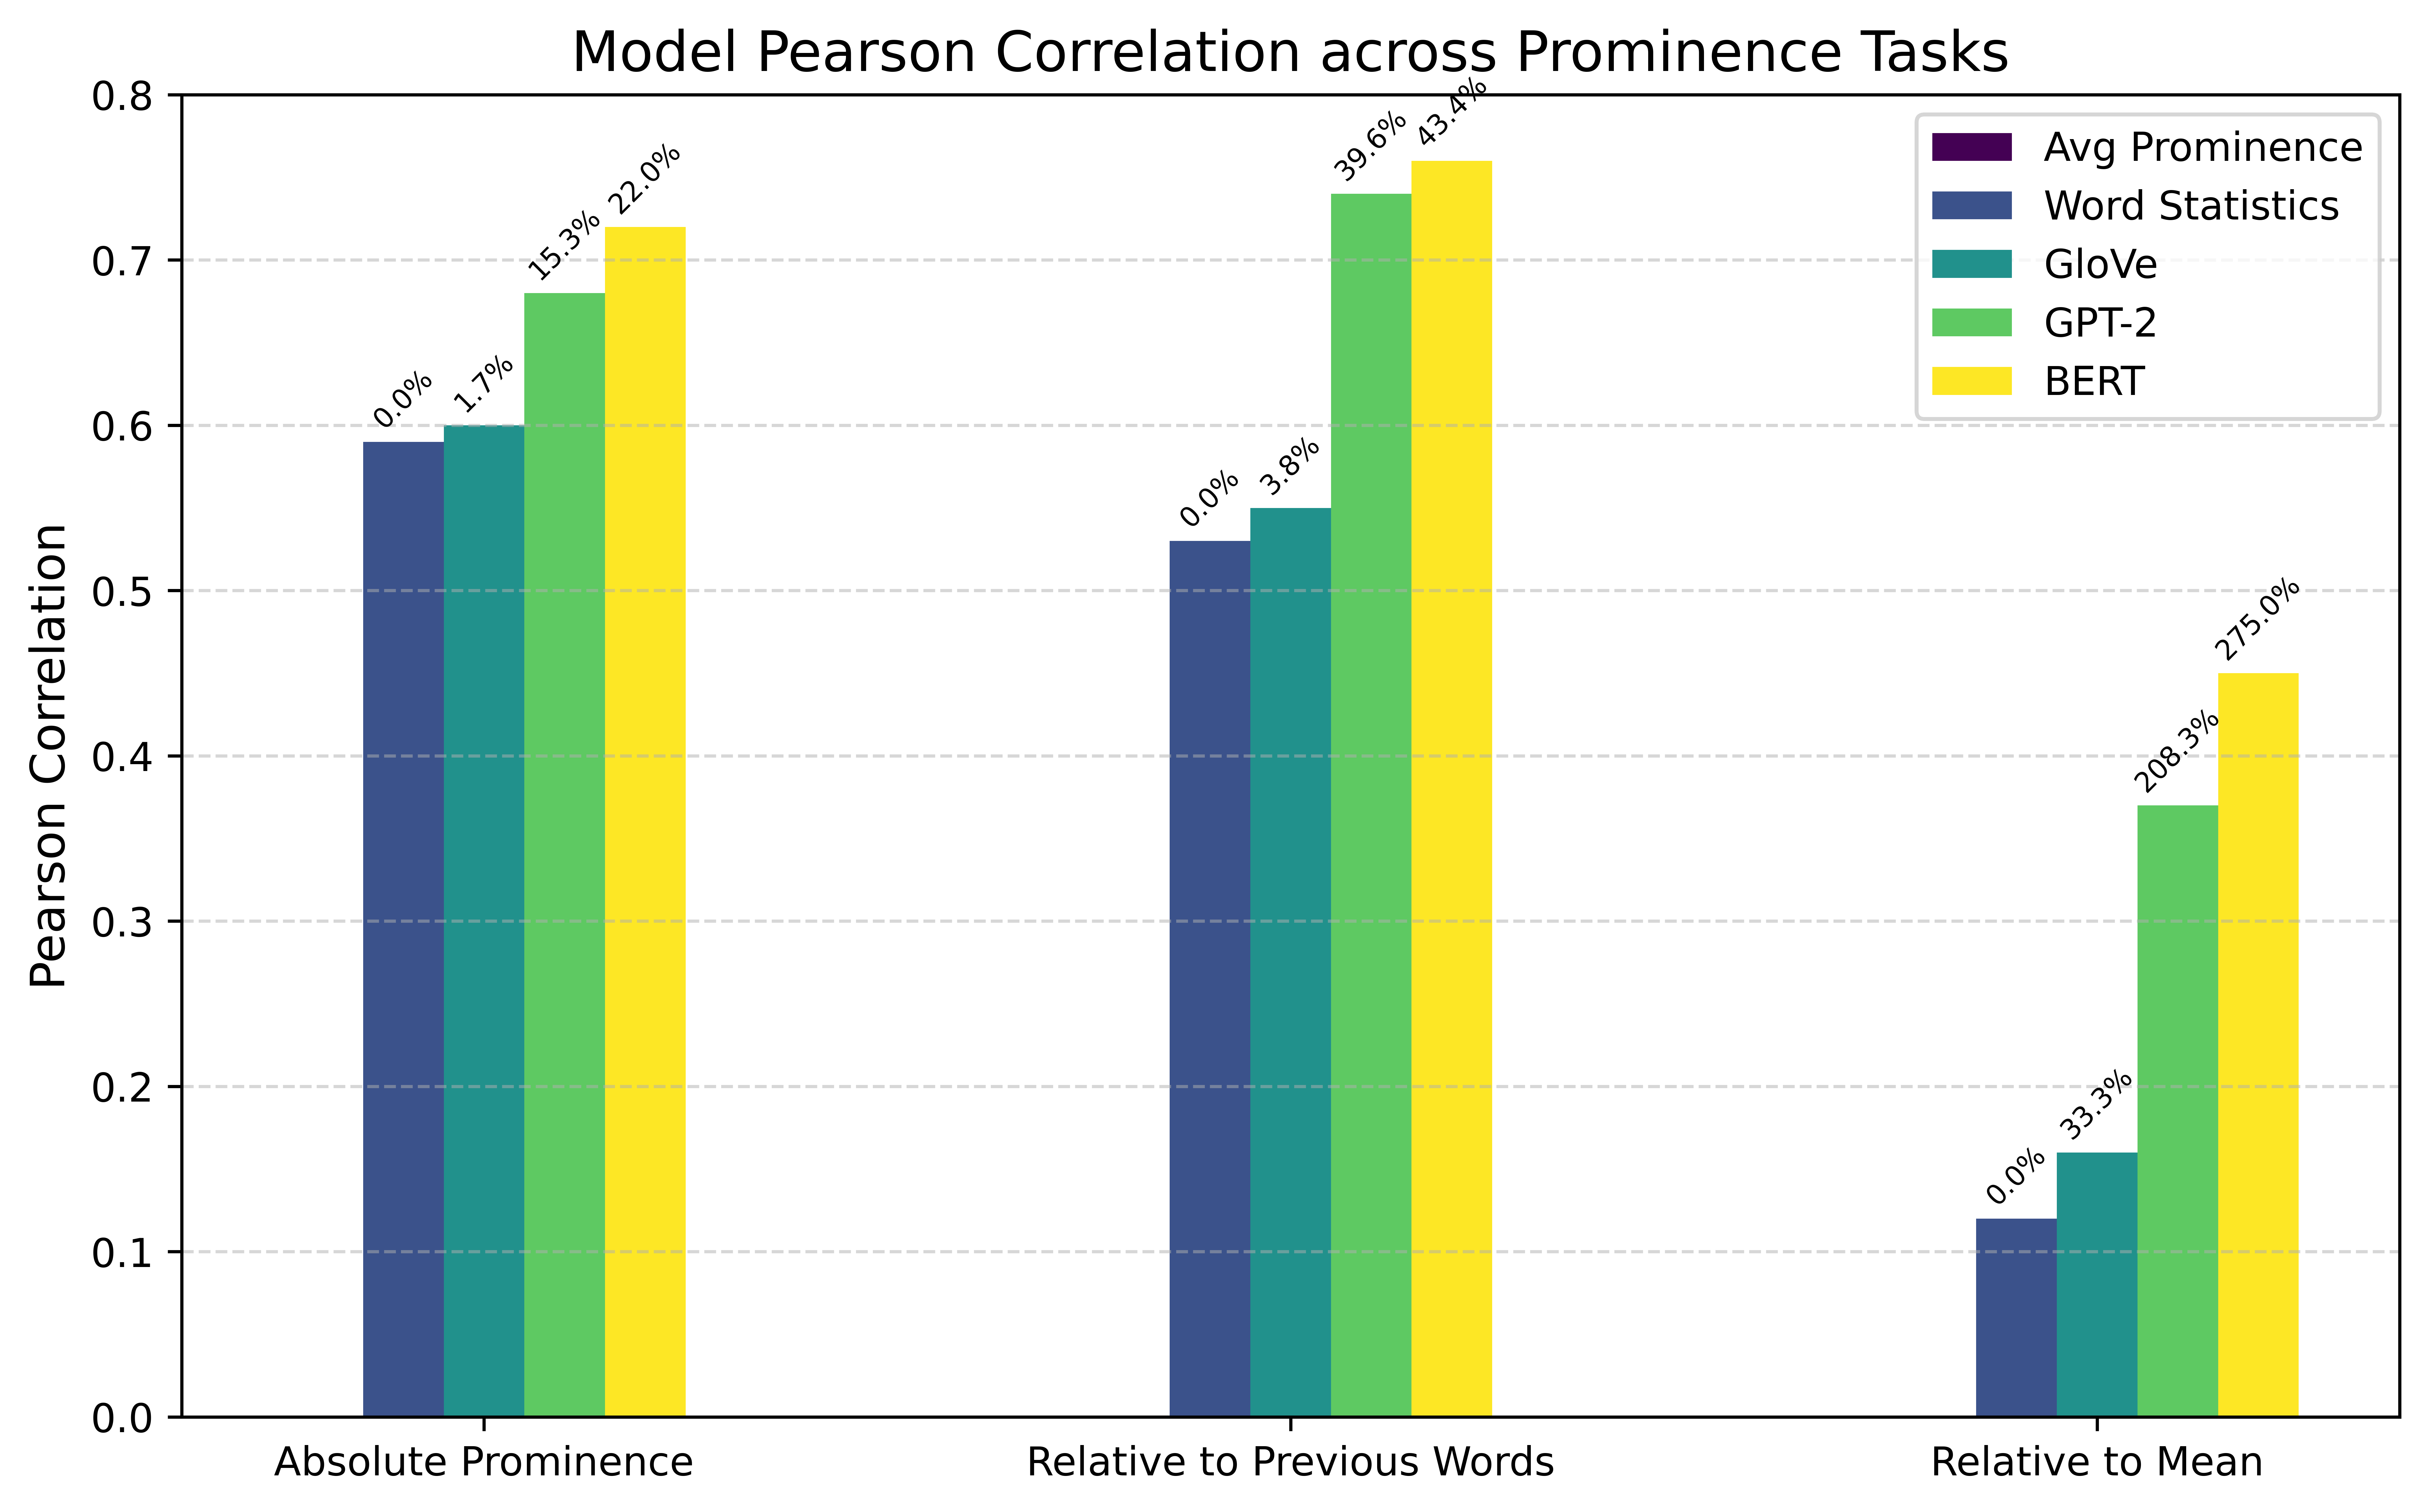

In [102]:
plot_language_model_performance(
    dict_pearson,
    title="Model Pearson Correlation across Prominence Tasks",
    minmetric=False,
    metric="Pearson Correlation",
    y_lim=(0, 0.8),
)

## Duration 

In [103]:
dict_duration = {
    "Word Statistics": {"MSE": 0.75e-2, "R2": 0.77, "Pearson": 0.88},
    "GloVe": {"MSE": 0.74e-2, "R2": 0.77, "Pearson": 0.88},
    "GPT-2": {"MSE": 0.63e-2, "R2": 0.82, "Pearson": 0.91},
    "BERT": {"MSE": 0.57e-2, "R2": 0.84, "Pearson": 0.93},
}

In [105]:
import matplotlib.pyplot as plt
import numpy as np


def plot_model_duration(data, title=""):
    """
    :param data: Dictionary of model names and their corresponding task errors.
                 Format: {model_name: {task_name: error}}
    """

    models = list(data.keys())
    metrics = list(data[models[0]].keys())

    num_models = len(models)
    num_metrics = len(metrics)

    bar_width = 0.2
    index = np.arange(num_models)

    colors = plt.cm.viridis(np.linspace(0, 1, num_models))

    fig, axs = plt.subplots(1, num_metrics, figsize=(num_metrics * 6, 6))

    for i, metric in enumerate(metrics):
        durations = [data[model][metric] for model in models]
        axs[i].bar(index, durations, width=bar_width, color=colors)
        axs[i].set_title(metric)
        axs[i].set_xticks(index)
        axs[i].set_xticklabels(models)
        axs[i].grid(axis="y", linestyle="--", alpha=0.5)

        # calculate percentage improvement and annotate it on each bar
        base_value = durations[0]  # the value of the first bar
        for j, value in enumerate(durations[1:], 1):
            improvement = (value - base_value) / base_value * 100
            axs[i].text(j, value, f"{improvement:.2f}%", ha="center", va="bottom")

    fig.suptitle(title, fontsize=14)
    fig.text(0.5, 0.04, "Models", ha="center", va="center")
    # fig.text(0.04, 0.5, "Error", ha="center", va="center", rotation="vertical")

    plt.show()


# Use the function
dict_duration = {
    "Word Statistics": {"MSE": 0.75e-2, "R2": 0.77, "Pearson": 0.88},
    "GloVe": {"MSE": 0.74e-2, "R2": 0.77, "Pearson": 0.88},
    "GPT-2": {"MSE": 0.63e-2, "R2": 0.82, "Pearson": 0.91},
    "BERT": {"MSE": 0.57e-2, "R2": 0.84, "Pearson": 0.93},
}
plot_model_duration(dict_duration, title="Model Performance Comparison")

### Break Regression